In [1]:
# autoreload the module using jupyter magic command
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import json
# from brokenaxes import brokenaxes

In [2]:
save_path = "D:/BaiduSyncdisk/papers/SciAdv_i2bot/figures/subfigures/"
# save_path = "E:/XSUN_BAIDU_DOC/BaiduSyncdisk/papers/SciAdv_i2bot/figures/subfigures/"

In [9]:
from utils import Logger

log = Logger('data/')

log.data['test'] = 'test'

log.log('test1')
log.save()

In [21]:
# read json file
import json
with open('data/fk_gait_data.json', 'r') as f:
    data = json.load(f)

data.keys()

dict_keys(['ps-Leg-FL', 'ts-Leg-FL', 'torque-Leg-FL', 'ps-Leg-FR', 'ts-Leg-FR', 'torque-Leg-FR', 'ps-Leg-ML', 'ts-Leg-ML', 'torque-Leg-ML', 'ps-Leg-MR', 'ts-Leg-MR', 'torque-Leg-MR', 'ps-Leg-HL', 'ts-Leg-HL', 'torque-Leg-HL', 'ps-Leg-HR', 'ts-Leg-HR', 'torque-Leg-HR', 'time', 'velocity', 'position'])

In [4]:
import numpy as np
np.array(data['ps-Leg-FL'])[:,0].shape

(80,)

In [37]:
len(data['ts-Leg-FL'])

800

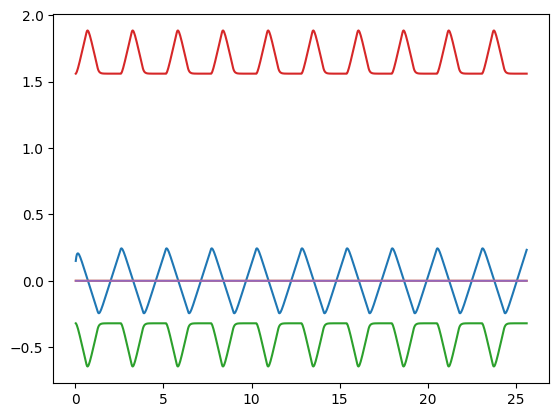

In [22]:
import matplotlib.pyplot as plt

plt.plot(data['time'], np.array(data['ps-Leg-FL'])[:,0])
plt.plot(data['time'], np.array(data['ps-Leg-FL'])[:,1])
plt.plot(data['time'], np.array(data['ps-Leg-FL'])[:,2])
plt.plot(data['time'], np.array(data['ps-Leg-FL'])[:,3])
plt.plot(data['time'], np.array(data['ps-Leg-FL'])[:,4])


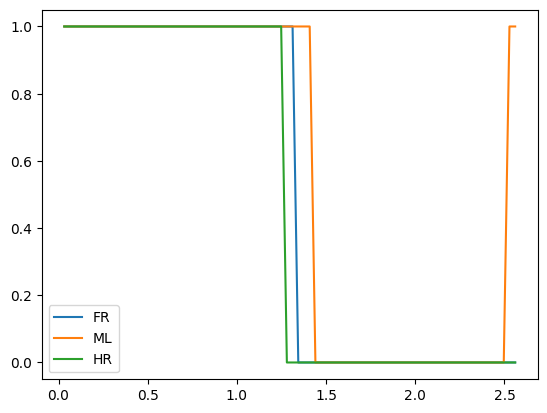

In [15]:
# plt.plot(data['time'], np.array(data['ts-Leg-FL']),label='FL')
plt.plot(data['time'], np.array(data['ts-Leg-FR']),label='FR')
plt.plot(data['time'], np.array(data['ts-Leg-ML']),label='ML')
# plt.plot(data['time'], np.array(data['ts-Leg-MR']),label='MR')
# plt.plot(data['time'], np.array(data['ts-Leg-HL']),label='HL')
plt.plot(data['time'], np.array(data['ts-Leg-HR']),label='HR')
plt.legend()

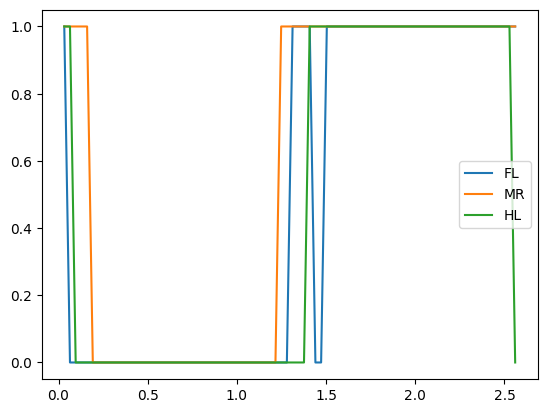

In [14]:
plt.plot(data['time'], np.array(data['ts-Leg-FL']),label='FL')
# plt.plot(data['time'], np.array(data['ts-Leg-FR']),label='FR')
# plt.plot(data['time'], np.array(data['ts-Leg-ML']),label='ML')
plt.plot(data['time'], np.array(data['ts-Leg-MR']),label='MR')
plt.plot(data['time'], np.array(data['ts-Leg-HL']),label='HL')
# plt.plot(data['time'], np.array(data['ts-Leg-HR']),label='HR')
plt.legend()

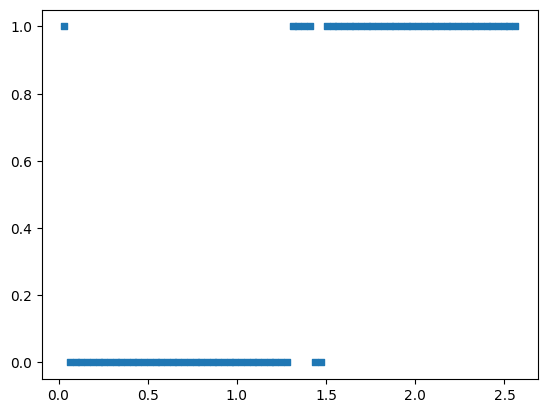

In [19]:
import matplotlib.patches as patches
# # Draw a rectangle with filled or unfilled color based on the condition
# if condition:
#     rect = patches.Rectangle((x, y), width, height, facecolor='green')
# else:
#     rect = patches.Rectangle((x, y), width, height, facecolor='red', fill=False)

fig, ax = plt.subplots()
ax.scatter(data['time'], np.array(data['ts-Leg-FL']),label='FL', marker='s', s=20)


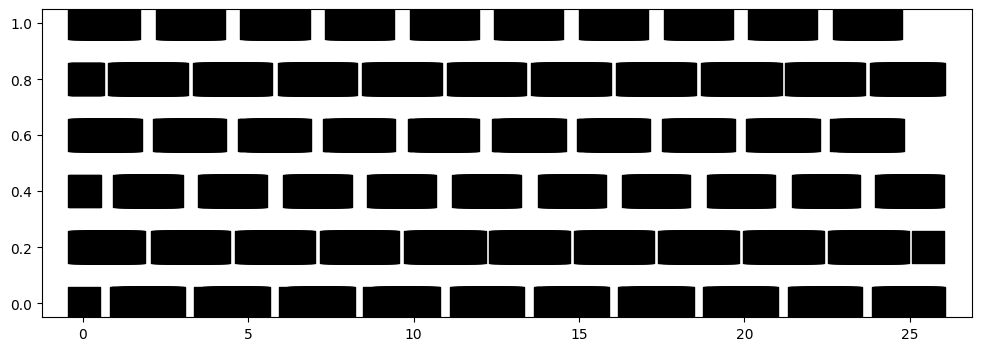

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
for j, leg in enumerate(['FL', 'ML', 'HL', 'FR', 'MR', 'HR']):
    for i, s in enumerate(data['ts-Leg-{}'.format(leg)]):
        if s > 0:
            ax.scatter(data['time'][i], j*0.2, marker='s', s=500, c='k')


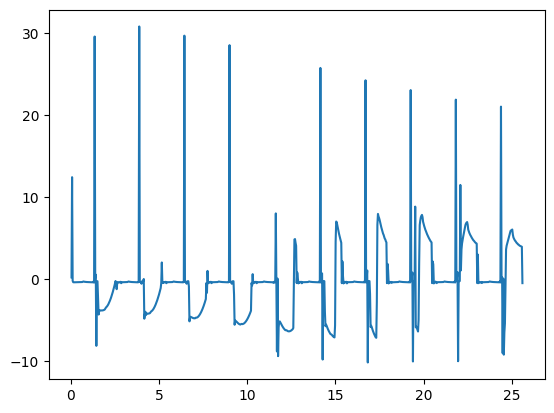

In [38]:
plt.plot(data['time'], np.array(data['torque-Leg-FL'])[:,0])
# plt.plot(data['time'], np.array(data['torque-Leg-FL'])[:,1])
# plt.plot(data['time'], np.array(data['torque-Leg-FL'])[:,2])
# plt.plot(data['time'], np.array(data['torque-Leg-FL'])[:,3])
# plt.plot(data['time'], np.array(data['torque-Leg-FL'])[:,4])

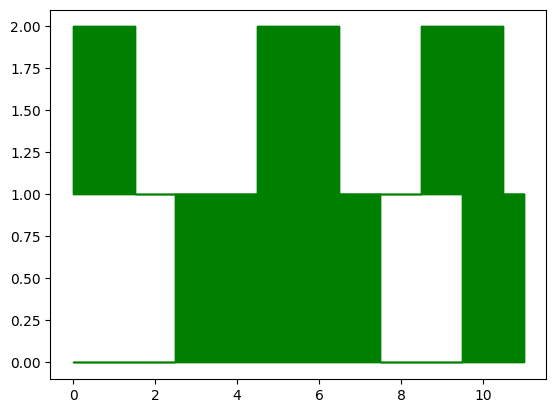

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define your data
data = [[0,0,0,1,1,1,1,1,0,0,1,1], [1,1,0,0,0,1,1,0,0,1,1,0]]

# Create a figure and an axis
fig, ax = plt.subplots()

# Iterate over your data
for i, series in enumerate(data):
    series = np.array(series)
    mask = series == 1
    ax.fill_between(np.arange(len(series)), i, i+mask, color='green', step='mid')
    ax.fill_between(np.arange(len(series)), i, i+mask, color='green', step='mid')



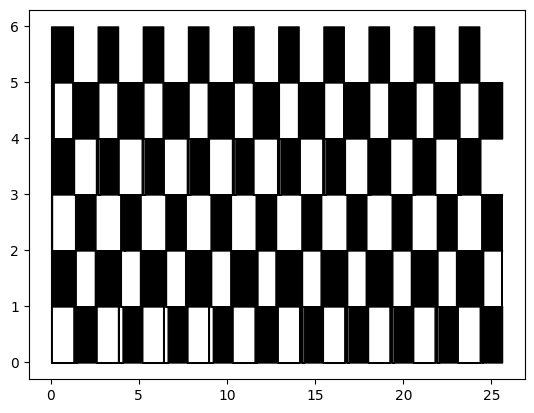

In [7]:
t_data = [data['ts-Leg-{}'.format(leg)] for leg in ['FL', 'ML', 'HL', 'FR', 'MR', 'HR']]
# Create a figure and an axis
fig, ax = plt.subplots()

# Iterate over your data
for i, series in enumerate(t_data):
    series = np.array(series)
    mask = series == 1
    # ax.fill_between(np.arange(len(series)), i, i+mask, color='k', step='mid')
    ax.fill_between(data['time'], i, i+mask, color='k', step='mid')


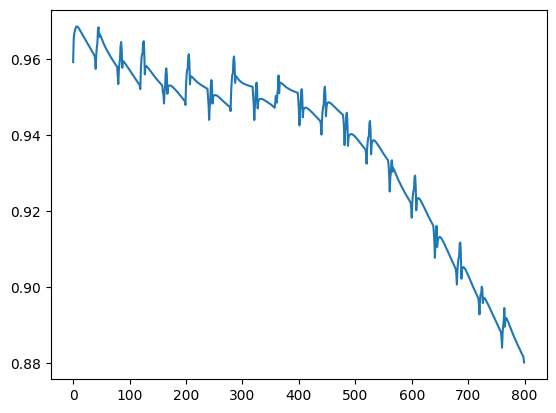

In [19]:
plt.plot(np.array(data['position'])[:, 2])

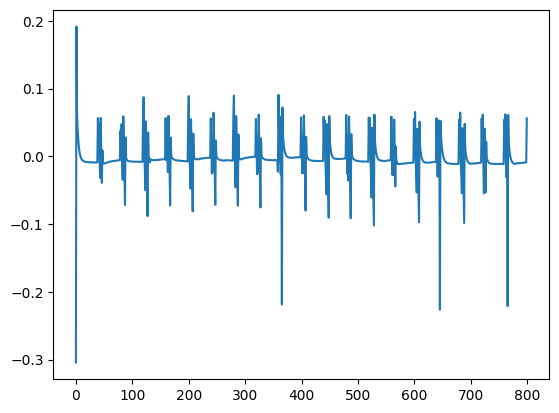

In [18]:
plt.plot(np.array(data['velocity'])[:, 2])

### Figures in Paper

In [41]:
from constant import *
def plot_leg_joint(data, leg='FL', end_time=240):
    fig, axes = plt.subplots(2,1,figsize=(8, 6))
    name = 'torque-Leg-' + leg
    ax = axes[1]
    for i in range(5):
        ax.plot(data['time'], np.array(data[name])[:,i], lw=2, color=LEG_SEG_COLOR[i], label=LEG_JOINT_NAME[i])
    # add swing and stance phase
    t_data = data['ts-Leg-{}'.format(leg)]
    mask = np.array(t_data) == 1
    ax.fill_between(data['time'], -50, -50 + mask*110, color='k', step='mid', alpha=0.1, label='Stance', edgecolor=None)
    ax.set_ylim(-50, 60)
    ax.set_xlim(0, data['time'][end_time])
    ax.set_xlabel('Time (s)', fontsize=16)
    ax.set_ylabel('Torque (N⋅m)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax = axes[0]
    name = 'ps-Leg-' + leg
    for i in range(5):
        ax.plot(data['time'], np.array(data[name])[:,i], lw=2, color=LEG_SEG_COLOR[i], label=LEG_JOINT_NAME[i])
    # add swing and stance phase
    t_data = data['ts-Leg-{}'.format(leg)]
    mask = np.array(t_data) == 1
    ax.fill_between(data['time'], -2, -2 + mask*5, color='k', step='mid', alpha=0.1, label='Stance', edgecolor=None)
    ax.set_ylim(-1, 2)
    ax.legend(fontsize=12)
    ax.set_xlim(0, data['time'][end_time])
    # ax.set_xticklabels(ax.get_xticks(), fontsize=12)
    # ax.set_yticklabels(ax.get_yticks(), fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_ylabel('Position (rad)',fontsize=16)
    return fig, axes

IK Gait

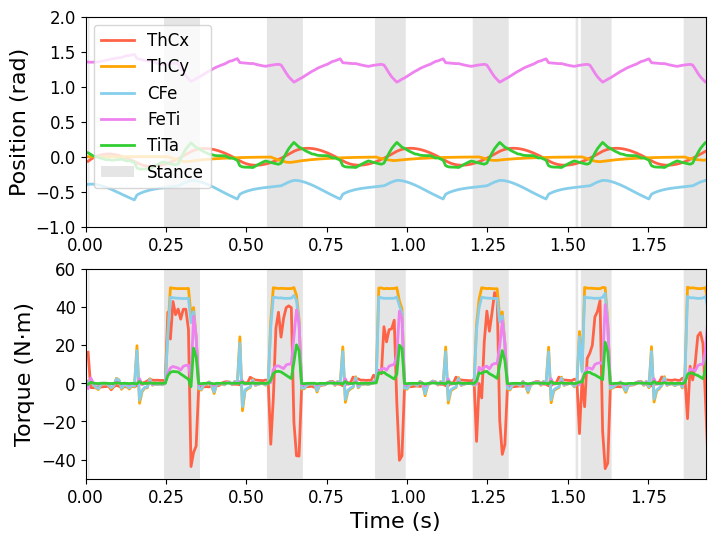

In [57]:
# read json file
import json
from constant import *
with open('data/ik_gait_data.json', 'r') as f:
    data_gait_ik = json.load(f)
fig, ax = plot_leg_joint(data_gait_ik, 'ML')
plt.savefig(save_path + 'ik_gait_ML.pdf', dpi=300)

FK Gait

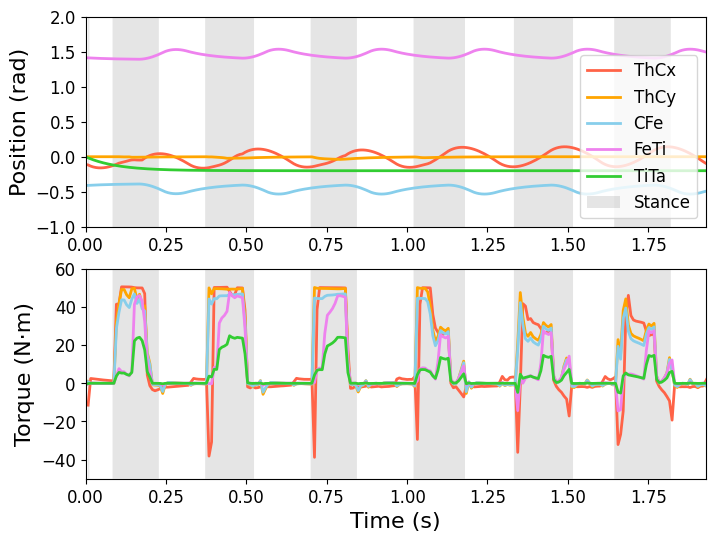

In [58]:
# read json file
import json
from constant import *
with open('data/fk_gait_data.json', 'r') as f:
    data_gait_fk = json.load(f)

fig, ax = plot_leg_joint(data_gait_fk, 'ML')
plt.savefig(save_path + 'fk_gait_ML.pdf', dpi=300)

three types of gait 

In [49]:
with open(f'data/fk_gait_ripple_data.json', 'r') as f:
    data_gait_ripple_fk = json.load(f)

with open(f'data/fk_gait_wave_data.json', 'r') as f:
    data_gait_wave_fk = json.load(f)

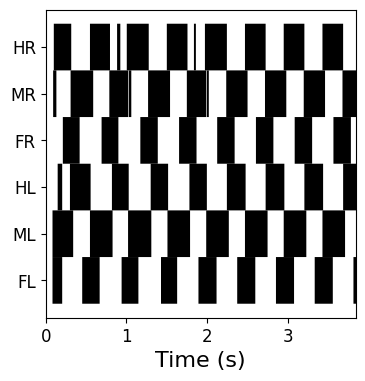

In [71]:
def plot_gait_phase(data, end_time=480):
    fig, ax = plt.subplots(1,1,figsize=(4, 4))
    legs = ['FL', 'ML', 'HL', 'FR', 'MR', 'HR']
    t_data = [data['ts-Leg-{}'.format(leg)] for leg in legs]
    for i, series in enumerate(t_data):
        series = np.array(series)
        mask = series == 1
        # ax.fill_between(np.arange(len(series)), i, i+mask, color='k', step='mid')
        ax.fill_between(data['time'], i, i+mask, color='k', step='mid', edgecolor=None)
    # set yticks as leg names
    ax.set_yticks(np.arange(6)+0.5)
    ax.set_yticklabels(legs)
    ax.set_xlim(0, data['time'][end_time-1])
    ax.set_xlabel('Time (s)', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    return fig, ax

# fig, ax = plot_gait_phase(data_gait_ripple_fk, len(data_gait_ripple_fk['time']))
fig, ax = plot_gait_phase(data_gait_ripple_fk, 480)
plt.savefig(save_path + 'fk_gait_ripple_phase.pdf', dpi=300)

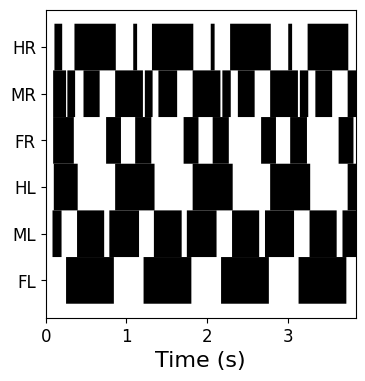

In [77]:
# fig, ax = plot_gait_phase(data_gait_wave_fk, len(data_gait_wave_fk['time']))
fig, ax = plot_gait_phase(data_gait_wave_fk, 480)
plt.savefig(save_path + 'fk_gait_wave_phase.pdf', dpi=300)

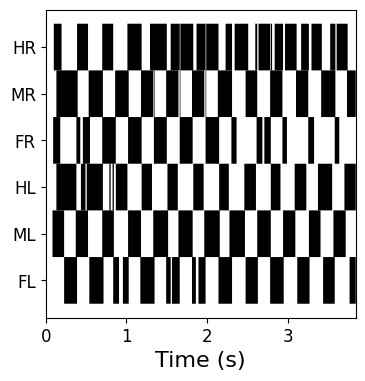

In [69]:
# fig, ax = plot_gait_phase(data_gait_fk, len(data_gait_fk['time']))
fig, ax = plot_gait_phase(data_gait_fk, 480)
plt.savefig(save_path + 'fk_gait_tripod_phase.pdf', dpi=300)

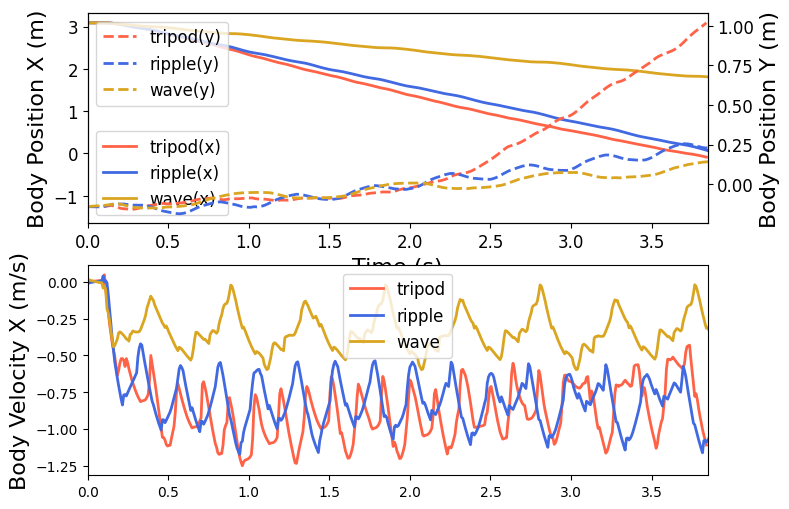

In [78]:
def plot_gait_motion_compare(data_list, end_time=320):
    fig, axes = plt.subplots(2, 1,figsize=(8, 6))
    colors = ['tomato', 'royalblue', 'goldenrod']
    ax = axes[0]
    ax_w = ax.twinx()
    for (k, data), c in zip(data_list.items(), colors):
        ax.plot(data['time'], np.array(data['position'])[:, 0], label=k+'(x)', color=c, lw=2)
        ax_w.plot(data['time'], np.array(data['position'])[:, 1], label=k+'(y)', color=c, lw=2, ls='--')
    ax.set_xlim(0, data['time'][end_time])
    ax.set_xlabel('Time (s)', fontsize=16)
    ax.set_ylabel('Body Position X (m)',fontsize=16)
    ax_w.set_ylabel('Body Position Y (m)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax_w.tick_params(axis='both', which='major', labelsize=12)
    ax_w.legend(fontsize=12)
    ax.legend(fontsize=12)
    
    # ax_w.set_xlim(0, data['time'][end_time])
    
    ax = axes[1]
    # ax_w = ax.twinx()
    for (k, data), c in zip(data_list.items(), colors):
        ax.plot(data['time'], np.array(data['velocity'])[:, 0], label=k, color=c, lw=2)
        # ax.plot(data['time'], np.array(data['velocity'])[:, 1], label=k, color=c, lw=2)
        # ax.plot(data['time'], np.array(data['position'])[:, 2], label=k, color=c, lw=2)
    ax.set_xlim(0, data['time'][end_time])
    ax.set_ylabel('Body Velocity X (m/s)',fontsize=16)
    ax.legend(fontsize=12)
    return fig, axes
fig, ax = plot_gait_motion_compare({'tripod':data_gait_fk, 'ripple':data_gait_ripple_fk, 'wave':data_gait_wave_fk},
                         len(data_gait_fk['time']))
plt.savefig(save_path + 'fk_gait_motion_compare.pdf', dpi=300)

uneven terrian

In [45]:
with open(f'data/ik_gait_uneven_z2_data.json', 'r') as f:
    data_uneven_z2 = json.load(f)

with open(f'data/ik_gait_uneven_z4_data.json', 'r') as f:
    data_uneven_z4 = json.load(f)

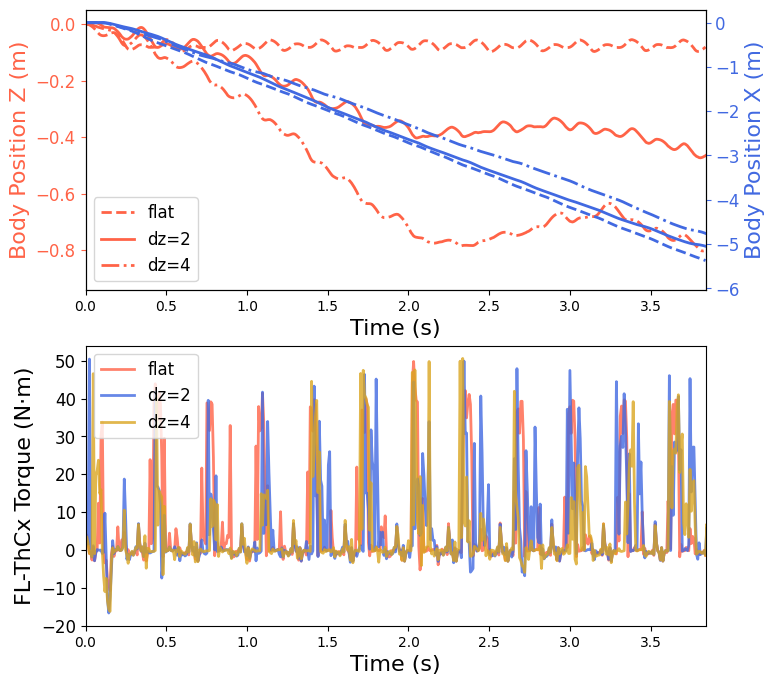

In [72]:
def plot_uneven_compare(data_list):
    fig, axes = plt.subplots(2,1,figsize=(8, 8))
    ax = axes[0]
    ax_w = ax.twinx()
    for (k, data), c in zip(data_list.items(),['--', '-','-.']):
        ax.plot(data['time'], np.array(data['position'])[:, 2]-np.array(data['position'])[0, 2], label=k, lw=2, color='tomato', ls=c)
        ax_w.plot(data['time'], np.array(data['position'])[:, 0]-np.array(data['position'])[0, 0], label=k, lw=2, color='royalblue', ls=c)
    ax.set_xlim(0, data['time'][-1])
    ax.set_xlabel('Time (s)', fontsize=16)
    ax.set_ylabel('Body Position Z (m)',fontsize=16, color='tomato')
    ax.tick_params(axis='y', which='major', labelsize=12, colors='tomato')
    ax.legend(fontsize=12)
    ax_w.set_ylabel('Body Position X (m)',fontsize=16,color='royalblue')
    ax_w.tick_params(axis='y', which='major', labelsize=12, colors='royalblue')
    
    ax = axes[1]
    # plot torque of the first joint of FL leg
    for (k, data), c in zip(data_list.items(),['tomato', 'royalblue', 'goldenrod']):
        ax.plot(data['time'], np.array(data['torque-Leg-FL'])[:,0], label=k, lw=2, color=c, alpha=0.8)
    ax.legend(fontsize=12)

    ax.set_xlabel('Time (s)', fontsize=16)
    ax.set_ylabel('FL-ThCx Torque (N⋅m)',fontsize=16)
    ax.tick_params(axis='y', which='major', labelsize=12)
    return fig, axes

fig, ax = plot_uneven_compare({'flat':data_gait_ik, 'dz=2':data_uneven_z2, 'dz=4':data_uneven_z4})
ax[0].set_xlim(0, data_gait_fk['time'][-1])
ax[1].set_xlim(0, data_gait_fk['time'][-1])

plt.savefig(save_path + 'ik_gait_uneven_compare.pdf', dpi=300)

adhesion (fk ripple gait)

In [54]:
# force = np.arange(140, 161, 1)
force = [130, 135, 140, 145, 150, 155, 160]
climb_data_ripple = []
for f in force:
    with open(f'data/fk_gait_adhesion_F{f}_data.json', 'r') as d:
        climb_data_ripple.append(json.load(d))

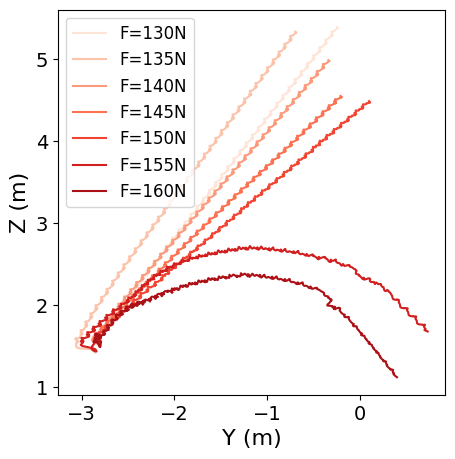

In [75]:
import matplotlib.cm as cm
def plot_climb_trajectory(force, data_list):
    fig, ax = plt.subplots(1,1,figsize=(5, 5))
    # Create a colormap
    cmap = cm.get_cmap('Reds')  # Change 'viridis' to any colormap you like
    for i, d in enumerate(data_list):
        color = cmap(i / (len(data_list)+1) + 0.1)
        # ax.plot(np.array(d['time']), np.array(d['position'])[:, 2])
        ax.plot(np.array(d['position'])[:, 1], np.array(d['position'])[:, 2], label=f'F={force[i]}N', color=color)
    ax.legend(fontsize=12)
    ax.set_xlabel('Y (m)', fontsize=16)
    ax.set_ylabel('Z (m)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    return fig, ax

fig, ax = plot_climb_trajectory(force, climb_data_ripple)
plt.savefig(save_path + 'fk_gait_climb_trajectory.pdf', dpi=300)

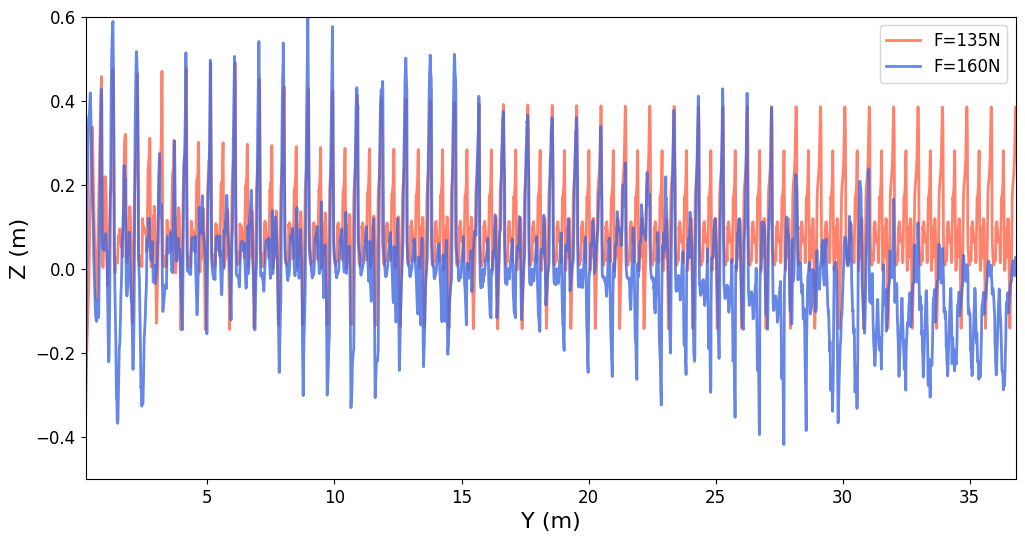

In [55]:
def plot_climb_velocity(data_list):
    fig, axis = plt.subplots(1,1,figsize=(12, 6))
    for d,f,c in zip(data_list, [135, 160],['tomato', 'royalblue']):
        axis.plot(d['time'], np.array(d['velocity'])[:,2], alpha=0.8, label=f'F={f}N',lw=2, color=c)
    axis.set_xlim(0.2, data_list[0]['time'][-200])
    axis.set_ylim(-0.5, 0.6)
    axis.legend(fontsize=12)
    axis.set_xlabel('Y (m)', fontsize=16)
    axis.set_ylabel('Z (m)',fontsize=16)
    axis.tick_params(axis='both', which='major', labelsize=12)
    return fig, axis

fig, ax = plot_climb_velocity([climb_data_ripple[1], climb_data_ripple[-1]])
plt.savefig(save_path + 'fk_gait_climb_velocity.pdf', dpi=300)

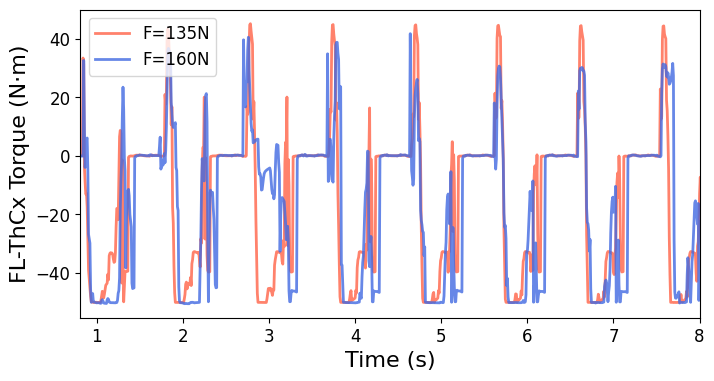

In [79]:
def plot_climb_torque(data_list):
    fig, axis = plt.subplots(1,1,figsize=(8, 4))
    for d,f,c in zip(data_list, [135, 160],['tomato', 'royalblue']):
        axis.plot(d['time'], np.array(d['torque-Leg-FL'])[:,0], alpha=0.8, label=f'F={f}N',lw=2, color=c)
    axis.set_xlim(np.array(data_list[0]['time'])[100],np.array(data_list[0]['time'])[1000])
    # axis.set_ylim(-0.5, 0.6)
    axis.legend(fontsize=12)
    axis.set_xlabel('Time (s)', fontsize=16)
    axis.set_ylabel('FL-ThCx Torque (N⋅m)',fontsize=16)
    axis.tick_params(axis='both', which='major', labelsize=12)
    return fig, axis

fig, ax = plot_climb_torque([climb_data_ripple[1], climb_data_ripple[-1]])
plt.savefig(save_path + 'fk_gait_climb_torque.pdf', dpi=300)

In [244]:
%history

# autoreload the module using jupyter magic command
%load_ext autoreload
%autoreload 2
# read json file
import json
with open('data/fk_gait_data.json', 'r') as f:
    data = json.load(f)

data.keys()
t_data = [data['ts-Leg-{}'.format(leg)] for leg in ['FL', 'ML', 'HL', 'FR', 'MR', 'HR']]
# Create a figure and an axis
fig, ax = plt.subplots()

# Iterate over your data
for i, series in enumerate(t_data):
    series = np.array(series)
    mask = series == 1
    # ax.fill_between(np.arange(len(series)), i, i+mask, color='k', step='mid')
    ax.fill_between(data['time'], i, i+mask, color='k', step='mid')
import matplotlib.pyplot as plt
import numpy as np

# Define your data
data = [[0,0,0,1,1,1,1,1,0,0,1,1], [1,1,0,0,0,1,1,0,0,1,1,0]]

# Create a figure and an axis
fig, ax = plt.subplots()

# Iterate over your data
for i, series in enumerate(data):
    series = np.array(series)
    mask = series == 1
    ax.fill_between(np.arange(len(series)), i, i+mask, color='green', step='mid')
    ax.fi

### Path integration

In [6]:
# load data
import json
import matplotlib.pyplot as plt
import numpy as np
data_list = []
for n in range(0, 13):
    with open(f'data/PI_{n}_data.json', 'r') as f:
        data = json.load(f)
        data_list.append(data)

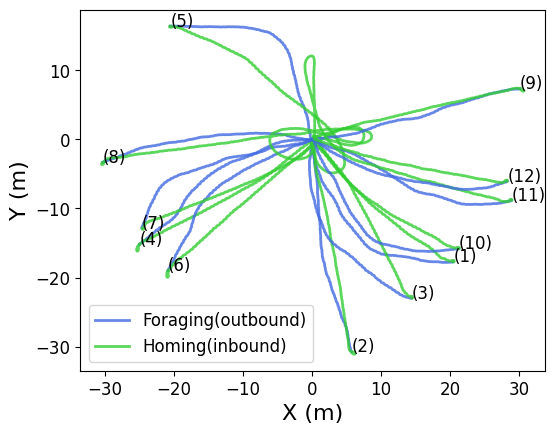

In [160]:
def plot_pi_trajectories(data_list, h_index=2):
    foraging_color = 'royalblue'
    homing_color = 'limegreen'
    h_start_t = 4000
    fig, ax = plt.subplots(1,1,figsize=(6, 6))
    c = 1
    for i, d in enumerate(data_list):
        if i != 6:
               
        # ax.plot(np.array(d['time']), np.array(d['position'])[:, 2])
                ax.plot(np.array(d['position'])[:h_start_t, 0], np.array(d['position'])[:h_start_t, 1], color=foraging_color,
                        lw=2, alpha=0.8)
                ax.plot(np.array(d['position'])[h_start_t:, 0], np.array(d['position'])[h_start_t:, 1], color=homing_color,
                        lw=2, alpha=0.8)
                ax.text(np.array(d['position'])[h_start_t, 0], np.array(d['position'])[h_start_t, 1], "({})".format(c), fontsize=12)
                c +=1
    ax.plot([],[],color=foraging_color, label='Foraging(outbound)', lw=2, alpha=0.8)
    ax.plot([],[],color=homing_color, label='Homing(inbound)', lw=2, alpha=0.8)
    ax.legend(fontsize=12)
    ax.set_xlabel('X (m)', fontsize=16)
    ax.set_ylabel('Y (m)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_aspect('equal')
    return fig, ax

fig, ax = plot_pi_trajectories(data_list)
plt.savefig(save_path + 'pi_trajectories.pdf', dpi=300)

In [58]:
[(len(d['time']),i) for i, d in enumerate(data_list)], max([(len(d['time']),i) for i, d in enumerate(data_list)])

([(8081, 0),
  (8801, 1),
  (8161, 2),
  (8721, 3),
  (10401, 4),
  (11121, 5),
  (16481, 6),
  (8401, 7),
  (14081, 8),
  (8881, 9),
  (8081, 10),
  (12001, 11),
  (8401, 12)],
 (16481, 6))

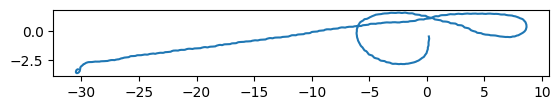

In [61]:
h_start_t = 4000
d = data_list[8]
plt.plot(np.array(d['position'])[h_start_t:, 0], np.array(d['position'])[h_start_t:, 1],)
plt.gca().set_aspect('equal', adjustable='box')

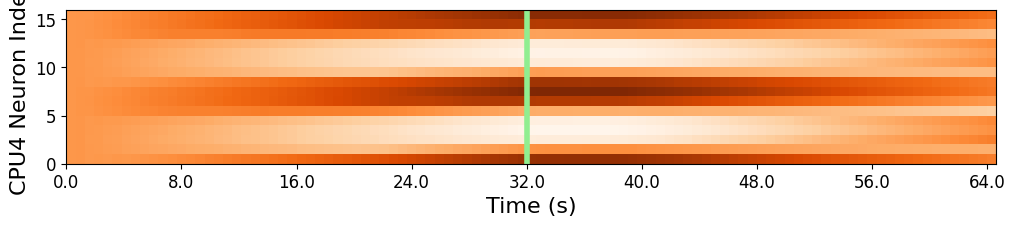

In [169]:
# plot the CPU4 neuron activity as a function of time use colormesh
def plot_cpu4(d1):
    fig, ax = plt.subplots(figsize=(12, 2))
    cmap = 'viridis'
    cmap = 'Oranges'
    ax.pcolormesh(np.array(d1['CPU4']).T, cmap=cmap)

    ax.set_xlabel('Time (s)', fontsize=16)
    t = np.arange(0, len(d1['CPU4']), 1000)
    ax.set_xticks(t, [str(i*0.008) for i in t])


    # verticle line indicating start of homing
    ax.axvline(4000, color='lightgreen', lw=4)
    ax.set_xlim(0, len(d1['CPU4']))
    ax.set_ylabel('CPU4 Neuron Index',fontsize=16)
    # ax.set_ylabel('CPU4 activation',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    return fig, ax

fig, ax = plot_cpu4(data_list[0])
# plt.savefig(save_path + 'pi_cpu4_time.png', dpi=300)

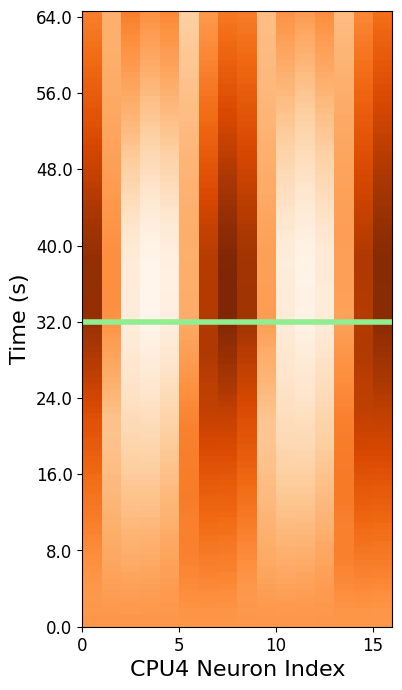

In [164]:
# plot the CPU4 neuron activity as a function of time use colormesh
def plot_cpu4_vertical(d1):
    fig, ax = plt.subplots(figsize=(4, 8))
    # ax = axes[0]
    cmap = 'viridis'
    cmap = 'Oranges'
    ax.pcolormesh(np.array(d1['CPU4']), cmap=cmap)
    ax.set_ylabel('Time (s)', fontsize=16)
    t = np.arange(0, len(d1['CPU4']), 1000)
    ax.set_yticks(t, [str(i*0.008) for i in t])
    # ax.set_xticks(range(16), [str(x) for x in range(16)])
    # verticle line indicating start of homing
    ax.axhline(4000, color='lightgreen', lw=4)
    # ax.set_ylim(0, 10000)
    ax.set_xlabel('CPU4 Neuron Index',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # ax=axes[1]
    # for bs in [16, 32, 80]:
    #     ax.plot(np.array(d1['CPU4'])[int(bs/0.008), :] + bs, label=f'BS={bs}', color='orange')
    return fig, ax

fig, ax = plot_cpu4_vertical(data_list[0])
plt.savefig(save_path + 'pi_cpu4_time.png', dpi=300)

In [145]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bottom side(s) of the bars.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coord

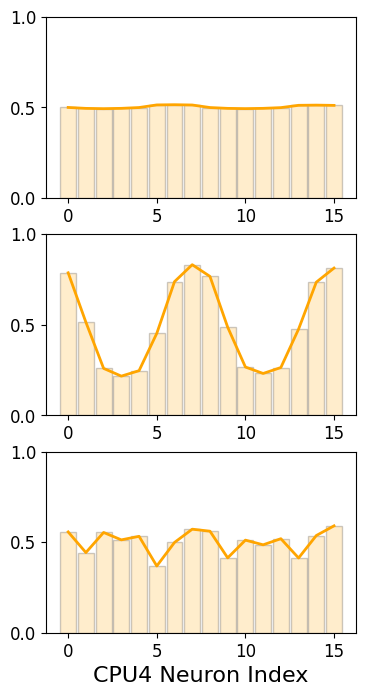

In [162]:
def plot_cpu4_sample_value(d1, bs=[0]):
    fig, ax = plt.subplots(len(bs),1,figsize=(4, 8))

    # ax=axes[1]
    for i, bs in enumerate(bs):
        ax[i].plot(np.array(d1['CPU4'])[int(bs/0.008), :], lw=2, color='orange')
        # ax[i].set_xticks(range(16), [str(x) for x in range(16)])
        ax[i].set_ylim(0, 1.0)
        ax[i].set_yticks([0, 0.5, 1.0])
        ax[i].tick_params(axis='both', which='major', labelsize=12)
        ax[i].bar(range(16),np.array(d1['CPU4'])[int(bs/0.008), :] , width=0.9, alpha=0.2, facecolor='orange', edgecolor='k')
    
    ax[-1].set_xlabel('CPU4 Neuron Index',fontsize=16)
    return fig, ax

fig,ax=plot_cpu4_sample_value(data_list[0], bs=[2, 32, 64])
plt.savefig(save_path + 'cpu4_sample_value.pdf', dpi=300)

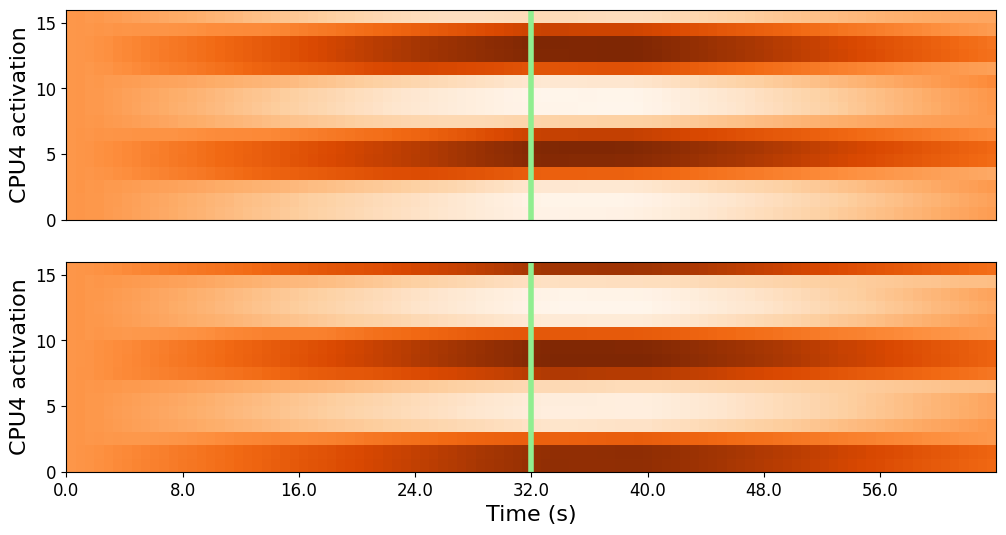

In [77]:
# plot the CPU4 neuron activity as a function of time use colormesh
def plot_cpu4(d1, d2):
    fig, axes = plt.subplots(2,1,figsize=(12, 6))
    cmap = 'viridis'
    cmap = 'Oranges'
    axes[0].pcolormesh(np.array(d1['CPU4']).T, cmap=cmap)
    axes[1].pcolormesh(np.array(d2['CPU4']).T, cmap=cmap)
    axes[1].set_xlabel('Time (s)', fontsize=16)
    t = np.arange(0, 8000, 1000)
    axes[1].set_xticks(t, [str(i*0.008) for i in t])
    axes[0].set_xticks([],[])
    for ax in axes:
        # verticle line indicating start of homing
        ax.axvline(4000, color='lightgreen', lw=4)
        ax.set_xlim(0, 8000)
        ax.set_ylabel('CPU4 activation',fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)
    return fig, ax

fig, ax = plot_cpu4(data_list[7], data_list[9])

In [79]:
4000/32

125.0

In [10]:
# calculate PI input velocity
def calculate_pi_velocity(data):
    velocity = []
    interval = 80
    for i in range(1, len(data['time'])//interval):
        dt = data['time'][i*interval] - data['time'][(i-1)*interval]
        dx = data['position'][i*interval][0] - data['position'][(i-1)*interval][0]
        dy = data['position'][i*interval][1] - data['position'][(i-1)*interval][1]
        # dz = data['position'][i+interval][2] - data['position'][i][2]
        velocity.append([dx/dt, dy/dt])
    return data['time'][::interval][:len(velocity)], velocity

def calculate_speed(velocity):
    return np.sqrt(velocity[:,0]**2 + velocity[:,1]**2)

# plot velocity
def plot_pi_velocity(data):
    fig, axes = plt.subplots(2,1,figsize=(12, 6))
    vt, v = calculate_pi_velocity(data)
    axes[0].plot(vt, np.array(v)[:, 0], label='X', lw=2, color='royalblue')
    axes[0].plot(data['time'], np.array(data['velocity'])[:, 0], lw=2, alpha=0.5, color='royalblue')
    
    axes[0].plot(vt, np.array(v)[:, 1], label='Y', lw=2, color='tomato')
    axes[0].plot(data['time'], np.array(data['velocity'])[:, 1], lw=2, alpha=0.5, color='tomato')
    axes[0].set_ylabel('Velocity (m/s)',fontsize=16)

    axes[1].plot(vt, calculate_speed(np.array(v)), label='PI', lw=2, color='k')
    axes[1].plot(data['time'], calculate_speed(np.array(data['velocity'])), label='Motion', lw=2, color='k',alpha=0.3)
    axes[1].set_ylabel('Speed (m/s)',fontsize=16)
    axes[1].set_xlabel('Time (s)', fontsize=16)
    for ax in axes:
        # verticle line indicating start of homing
        ax.axvline(data['time'][4000], color='lightgreen', lw=4)
        ax.set_xlim(0, data['time'][-1])
        ax.legend(fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=12)
        
    return fig, ax
#plot velocity
# fig, ax  = plot_pi_velocity(data_list[0])
# plt.savefig(save_path + 'pi_velocity.pdf', dpi=300)

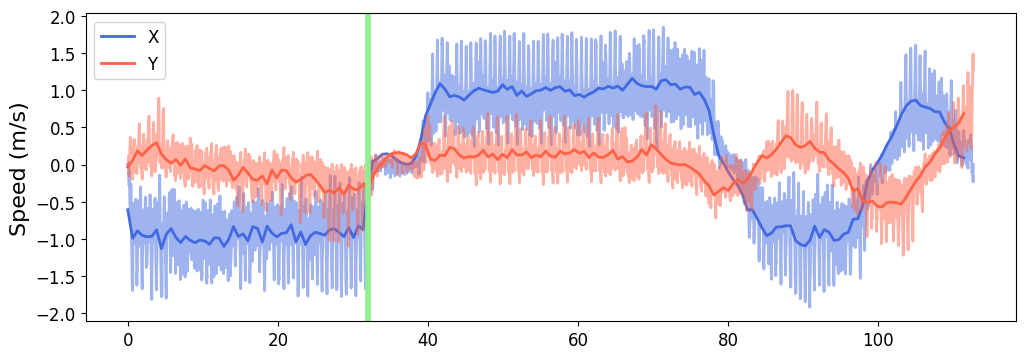

In [108]:
def plot_pi_velocity(data):
    fig, ax = plt.subplots(1,1,figsize=(12, 4))
    vt, v = calculate_pi_velocity(data)
    ax.plot(vt, np.array(v)[:, 0],  lw=2, color='royalblue', label='X')
    ax.plot(data['time'], np.array(data['velocity'])[:, 0], lw=2, alpha=0.5, color='royalblue')
    
    ax.plot(vt, np.array(v)[:, 1], lw=2, color='tomato', label='Y')
    ax.plot(data['time'], np.array(data['velocity'])[:, 1], lw=2, alpha=0.5, color='tomato')

    # verticle line indicating start of homing
    ax.axvline(data['time'][4000], color='lightgreen', lw=4)
    # ax.set_xlim(0, 8000)
    ax.set_ylabel('Speed (m/s)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(fontsize=12)
    return fig, ax
#plot velocity
fig, ax  = plot_pi_velocity(data_list[8])

visual compass

In [80]:
import json
with open(f'data/VisualCompassInc_1_data.json', 'r') as f:
    data_gradual = json.load(f)
with open(f'data/VisualCompassJump_1_data.json', 'r') as f:
    data_jump = json.load(f)


In [81]:
def set_compact_spines_format(ax, xticks=False):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if not xticks:
        ax.spines['bottom'].set_visible(False)
        ax.set_xticklabels([])
        ax.set_xticks([])

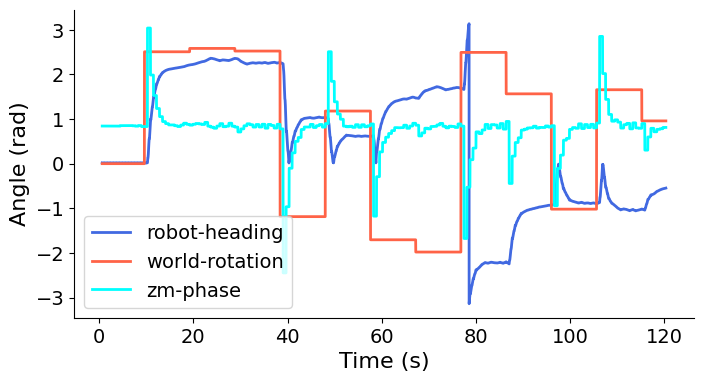

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from utils import pi2pi

def plot_angel_tracking(data):
    fig, ax = plt.subplots(1,1,figsize=(8, 4))
    ax.plot(data['time'], pi2pi(np.array(data['heading'])), lw=2, color='royalblue', label='robot-heading')
    ax.plot(data['time'], pi2pi(np.array(data['vs_node_dir'])), lw=2, color='tomato', label='world-rotation')
    ax.plot(data['time'], np.deg2rad(np.array(data['zm_phase'])), lw=2, color='cyan', label='zm-phase')
    ax.legend(fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_ylabel('Angle (rad)',fontsize=16)
    set_compact_spines_format(ax, xticks=True)
    # add title
    
    # ax.set_title("Incremental world rotation", fontsize=16)
    return fig, ax

fig, ax = plot_angel_tracking(data_jump)
plt.savefig(save_path + 'visual_compass_jump.pdf', dpi=300)

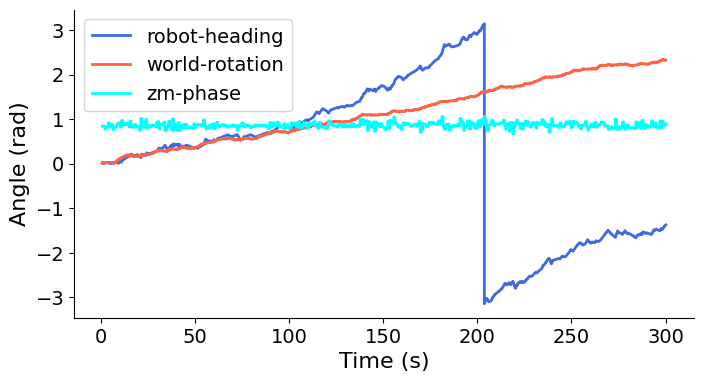

In [84]:
fig, ax = plot_angel_tracking(data_gradual)
plt.savefig(save_path + 'visual_compass_inc.pdf', dpi=300)

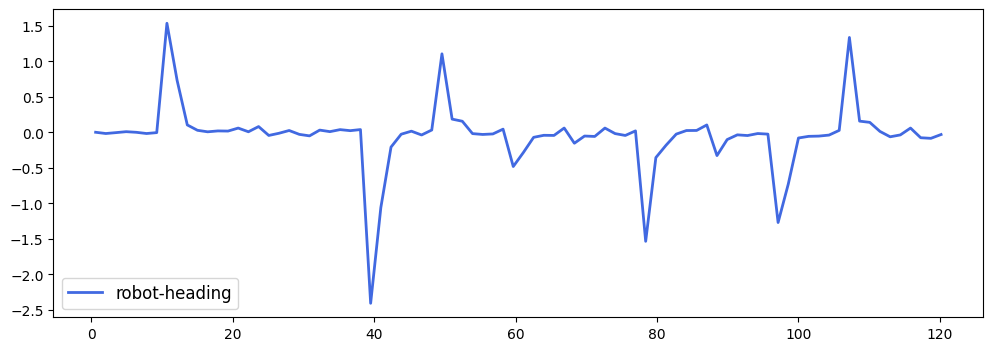

In [59]:
def plot_angular_velocity(data):
    fig, ax = plt.subplots(1,1,figsize=(12, 4))
    
    ax.plot(data['time'][::180], np.array(data['angular_velocity'])[::180, -1], lw=2, color='royalblue', label='robot-heading')
    
    ax.legend(fontsize=12)
    
    return fig, ax

fig, ax = plot_angular_velocity(data_jump)

In [13]:
np.array(data_gradual['velocity'])[0]

array([-0.00276396, -0.00312277])

visual beacons

In [61]:
# load data

left_data = []
for i in range(1, 6):
    with open(f'data/VisualBeaconLeft{i}_data.json', 'r') as f:
        left_data.append(json.load(f))

right_data = []
for i in range(1, 6):
    with open(f'data/VisualBeaconRight{i}_data.json', 'r') as f:
        right_data.append(json.load(f))

both_data = []
for i in range(1, 6):
    with open(f'data/VisualBeaconBoth{i}_data.json', 'r') as f:
        both_data.append(json.load(f))

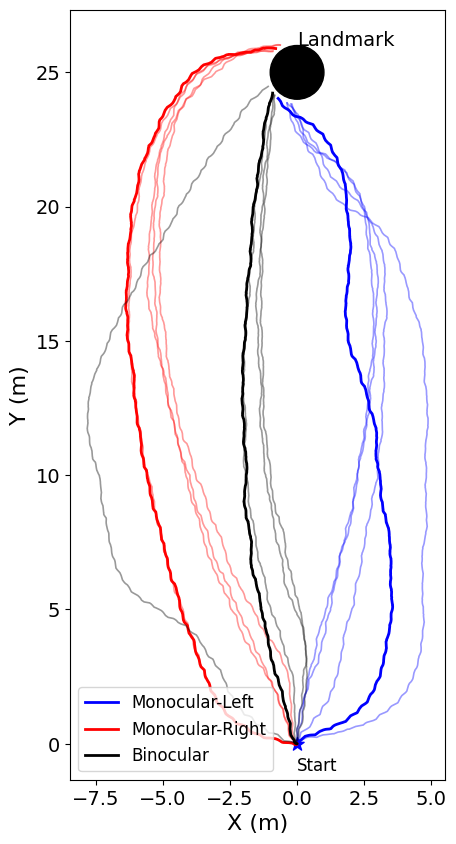

In [111]:
def plot_vb_trajectories(d1, d2, d3, h1, h2, h3):
    left_color = 'b'
    right_color = 'r'
    both_color = 'k'

    fig, ax = plt.subplots(1,1,figsize=(6,8))
    for i, d in enumerate(d1):
        if i == h1:
            ax.plot(-np.array(d['position'])[:, 0], -np.array(d['position'])[:, 1], color=left_color,
                    lw=2, alpha=1.0, label='Monocular-Left')
        else:
            ax.plot(-np.array(d['position'])[:, 0], -np.array(d['position'])[:, 1], color=left_color,
                    lw=1.2, alpha=0.4)

    for i, d in enumerate(d2):
        if i == h2:
            ax.plot(-np.array(d['position'])[:, 0], -np.array(d['position'])[:, 1], color=right_color,
                    lw=2, alpha=1.0, label='Monocular-Right')
        else:
            ax.plot(-np.array(d['position'])[:, 0], -np.array(d['position'])[:, 1], color=right_color,
                    lw=1.2, alpha=0.4)
    for i, d in enumerate(d3):
        if i == h3:
            ax.plot(-np.array(d['position'])[:, 0], -np.array(d['position'])[:, 1], color=both_color,
                    lw=2, alpha=1.0, label='Binocular')
        else:
            ax.plot(-np.array(d['position'])[:, 0], -np.array(d['position'])[:, 1], color=both_color,
                    lw=1.2, alpha=0.4)
    # start point
    ax.scatter(np.array(d1[0]['position'])[0, 0], np.array(d1[0]['position'])[0, 1], marker='*', s=100, color=left_color)
    ax.text(np.array(d1[0]['position'])[0, 0], np.array(d1[0]['position'])[0, 1]-1, 'Start', fontsize=12)
    # add the visual beacon as a circle
    ax.add_patch(plt.Circle((0, 25), 1, color='k', fill=True))
    ax.text(0, 26, 'Landmark', fontsize=14)
    
    ax.legend(fontsize=12)
    ax.set_xlabel('X (m)', fontsize=16)
    ax.set_ylabel('Y (m)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_aspect('equal')
    return fig, ax

fig, ax = plot_vb_trajectories(left_data, right_data, both_data, 2, 2, 2)
plt.savefig(save_path + 'visual_beacon_trajectories.pdf', dpi=300)

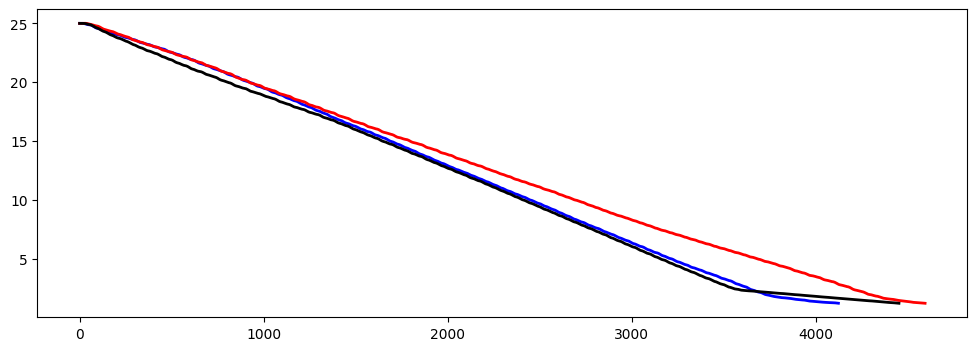

In [92]:
def plot_distance_to_landmark(data_list):
    fig, ax = plt.subplots(1,1,figsize=(12, 4))
    labels = ['Monocular-Left', 'Monocular-Right', 'Binocular']
    colors = ['b', 'r', 'k']
    landmark_p = np.array([0, -25])
    for i, ds in enumerate(data_list):
        distance = [np.linalg.norm(np.array(d['position'])[:,:2] - landmark_p, axis=1) for d in ds]
        # make the items of the distance the same length by adding the last value
        max_len = max([len(d) for d in distance])
        for j, d in enumerate(distance):
            if len(d) < max_len:
                distance[j] = np.append(d, [d[-1]]*(max_len-len(d)))
        average_distance = np.mean(distance, axis=0)
        ax.plot(average_distance, lw=2, color=colors[i], label=labels[i])
        # min_distance = [np.min(np.linalg.norm(np.array(d['position']) - landmark_p, axis=1)) for d in ds]
        # max_distance = [np.max(np.linalg.norm(np.array(d['position']) - landmark_p, axis=1)) for d in ds]
        
        # ax.fill_between(range(len(average_distance)), min_distance, max_distance, color=colors[i], alpha=0.1)
        
        
    return fig, ax

fig, ax = plot_distance_to_landmark([left_data, right_data, both_data])
plt.savefig(save_path + 'vb_distance.pdf', dpi=300)

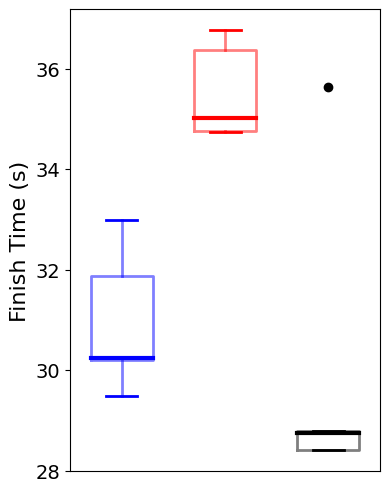

In [110]:
def plot_vb_finish_time(data):
    fig, ax = plt.subplots(1,1,figsize=(4, 6))
    labels = ['Monocular-Left', 'Monocular-Right', 'Binocular']
    colors = ['b', 'r', 'k']
    for i, ds in enumerate(data):
        finish_time = [d['time'][-1] for d in ds]
        
        # set colors
        boxprops = dict(linestyle='-', linewidth=2, color=colors[i], alpha=0.5)
        medianprops = dict(linestyle='-', linewidth=3, color=colors[i])
        whiskerprops = dict(linestyle='-', linewidth=2, color=colors[i], alpha=0.5)
        capprops = dict(linestyle='-', linewidth=2, color=colors[i])
        flierprops = dict(marker='o', markerfacecolor=colors[i], markersize=6, linestyle='none')

        ax.boxplot(finish_time, positions=[i], widths=0.6,
                   boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)

    # ax.legend(fontsize=12)
    ax.set_xticks([],[])
    # ax.set_axis_off()
    ax.set_ylabel('Finish Time (s)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)

    
    return fig, ax

fig, ax = plot_vb_finish_time([left_data, right_data, both_data])
plt.savefig(save_path + 'visual_beacon_finish_time.pdf', dpi=300)

In [86]:
def plot_vb_activation(data):
    pass

array([25.00032122, 25.00060503, 25.00085295, ...,  1.20785315,
        1.20282984,  1.19746951])

olfactory

+ odor trail following

In [14]:
import json

data = {}
for w in ['Wide','Normal']:
    for m in ['Fix', 'Move']:
        k = '{}_{}'.format(w, m)
        data.update({k: []})
        if m == 'Fix':
            with open('data/OdorTrialFollowing{}{}{}_data.json'.format(w,m, 1), 'r') as f:
                data[k].append(json.load(f))
        else:
            for i in range(1,6):
                with open('data/OdorTrialFollowing{}{}{}_data.json'.format(w,m, i), 'r') as f:
                    data[k].append(json.load(f))

In [15]:
def get_finish_time(data:dict):
    finish_time = {}
    for k, v in data.items():
        if 'Fix' in k:
            finish_time[k] = [v[0]['time'][-1]] * 5
        else:
            finish_time[k] = [d['time'][-1] for d in v]
    return finish_time

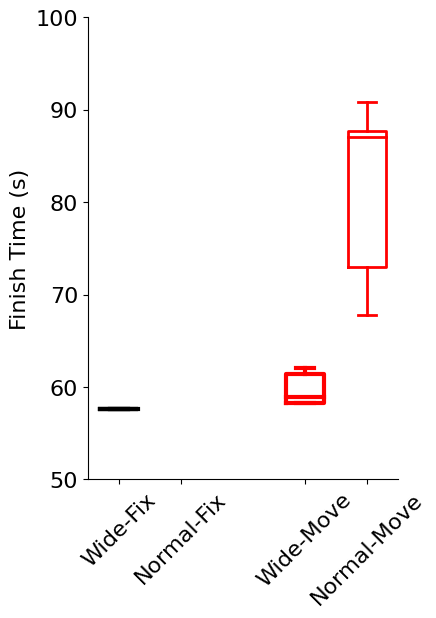

In [28]:
import matplotlib.pyplot as plt
# from brokenaxes import brokenaxes

def plot_finishe_time(data):
    fig, ax = plt.subplots(1,1,figsize=(4, 6))
    # ax = brokenaxes(ylims=((0, 62), (380, 410)), hspace=.05)
    for k, v in data.items():
        ps = {'Wide_Fix':0, 'Normal_Fix':1, 'Wide_Move':3, 'Normal_Move':4}
        colors = {'Wide_Fix':'k', 'Normal_Fix':'k', 'Wide_Move':'r', 'Normal_Move':'r'}
        lws = {'Wide_Fix':3, 'Normal_Fix':2, 'Wide_Move':3, 'Normal_Move':2}
        # set colors
        boxprops = dict(linestyle='-', linewidth=lws[k], color=colors[k], alpha=1)
        medianprops = dict(linestyle='-', linewidth=lws[k], color=colors[k])
        whiskerprops = dict(linestyle='-', linewidth=lws[k], color=colors[k], alpha=1)
        capprops = dict(linestyle='-', linewidth=lws[k], color=colors[k])
        flierprops = dict(marker='o', markerfacecolor=colors[k], markersize=6, linestyle='none')
        
        ax.boxplot(v, positions=[ps[k]], widths=0.6,
                   boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    set_compact_spines_format(ax, xticks=True)
    ax.set_ylabel('Finish Time (s)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_ylim(50, 100)
    ax.set_xticks([0, 1, 3, 4], ['Wide-Fix', 'Normal-Fix', 'Wide-Move', 'Normal-Move'], rotation=45)
    return fig, ax

# def plot_finishe_time_bax(data):
#     # fig, ax = plt.subplots(1,1,figsize=(4, 12))
#     fig = plt.figure(figsize=(4, 6))
#     ax = brokenaxes(fig=fig, ylims=((0, 62), (380, 410)), hspace=.05)
    
#     ps = {'Wide_Fix':0, 'Normal_Fix':1, 'Wide_Move':3, 'Normal_Move':4}
#     positions = [v for k, v in ps.items()]
#     vs = [data[k] for k in data.keys()]
#     colors = {'Wide_Fix':'k', 'Narrow_Fix':'k', 'Wide_Move':'r', 'Narrow_Move':'r'}
#     lws = {'Wide_Fix':4, 'Normal_Fix':2, 'Wide_Move':4, 'Normal_Move':2}
#     # set colors
#     boxprops = [dict(linestyle='-', linewidth=lws[k], color=colors[k], alpha=1) for k in data.keys()]
#     medianprops = [dict(linestyle='-', linewidth=lws[k], color=colors[k]) for k in data.keys()]
#     whiskerprops = [dict(linestyle='-', linewidth=lws[k], color=colors[k], alpha=1) for k in data.keys()]
#     capprops = [dict(linestyle='-', linewidth=lws[k], color=colors[k]) for k in data.keys()]
#     flierprops = [dict(marker='o', markerfacecolor=colors[k], markersize=6, linestyle='none') for k in data.keys()]
    
#     ax.boxplot(vs, positions=positions, widths=0.6,
#                boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
#     set_compact_spines_format(ax, xticks=True)
#     ax.set_ylabel('Finish Time (s)',fontsize=16)
#     ax.tick_params(axis='both', which='major', labelsize=16)
    
#     return ax

finish_time = get_finish_time(data)
ax = plot_finishe_time(finish_time)
plt.savefig(save_path + 'odor_trail_finish_time.pdf', dpi=300)


In [31]:
np.median([v for k, v in finish_time.items()], axis=1)

array([ 57.6 ,  58.88, 419.84,  87.04])

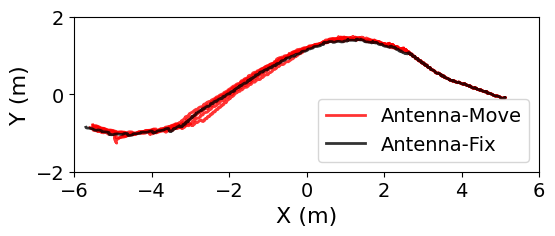

In [37]:
import numpy as np
def plot_ot_trajectory(data, d2):
    fig, ax = plt.subplots(1,1,figsize=(6, 6))
    for d in data:
        ax.plot(np.array(d['position'])[:, 0], np.array(d['position'])[:, 1], lw=2, alpha=0.8, color='r')
    # ax.plot(np.array(data[1]['position'])[:, 0], np.array(data[1]['position'])[:, 1], lw=2, alpha=0.3, color='r')
    ax.plot([], [], lw=2, alpha=0.8, color='r', label='Antenna-Move')
    ax.plot(np.array(d2['position'])[:, 0], np.array(d2['position'])[:, 1], lw=2, alpha=0.8, color='k', label='Antenna-Fix')
    ax.set_xlabel('X (m)', fontsize=16)
    ax.set_ylabel('Y (m)',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_aspect('equal')
    ax.set_xlim(-6,6)
    ax.set_ylim(-2,2)
    ax.legend(fontsize=14)
    return fig, ax

fig, ax = plot_ot_trajectory(data['Wide_Move'], data['Wide_Fix'][0])
plt.savefig(save_path + 'odor_trail_trajectory_wide.pdf', dpi=300)

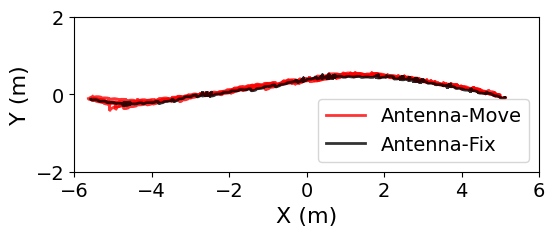

In [38]:
fig, ax = plot_ot_trajectory(data['Normal_Move'], data['Normal_Fix'][0])
plt.savefig(save_path + 'odor_trail_trajectory_normal.pdf', dpi=300)

IndexError: index 2 is out of bounds for axis 0 with size 2

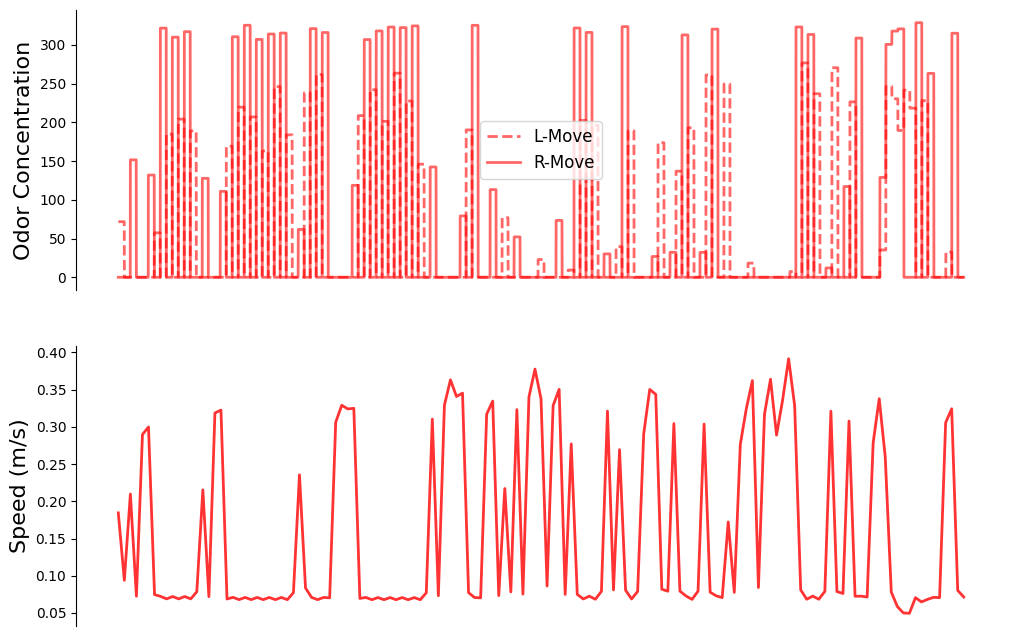

In [32]:
def calculate_velocity(data, end_time=480):
    velocity = []
    interval = 80
    t = np.array(data['time'])[:end_time]
    p = np.array(data['position'])[:end_time]
    for i in range(1, len(t)//interval):
        dt = t[i*interval] - t[(i-1)*interval]
        dx = p[i*interval][0] - p[(i-1)*interval][0]
        dy = p[i*interval][1] - p[(i-1)*interval][1]
        # dz = data['position'][i+interval][2] - data['position'][i][2]
        velocity.append([dx/dt, dy/dt])
    return t[::interval][:len(velocity)], velocity

def plot_ot_dynamic(data_list):
    fig, axes = plt.subplots(2,1,figsize=(12, 8))
    colors = ['red', 'k']
    cases = ['Move', 'Fix']
    # find the end time
    end_time = min([len(d['time']) for d in data_list])

    for i, data in enumerate(data_list):
        t = np.array(data['time'])[:end_time]
        # odor concentration
        ax = axes[0]
        ax.plot(t, 1000-np.array(data['odor_l'][:end_time]), lw=2, ls='--', color=colors[i], alpha=0.6, label=f'L-{cases[i]}')
        ax.plot(t, 1000-np.array(data['odor_r'][:end_time]), lw=2, ls='-', color=colors[i], alpha=0.6, label=f'R-{cases[i]}')
        set_compact_spines_format(ax)
        ax.set_ylabel('Odor Concentration',fontsize=16)
        ax.legend(fontsize=12)
        # translational velocity
        ax = axes[1]
        set_compact_spines_format(ax)
        vt, v = calculate_velocity(data, end_time=end_time)
        ax.plot(vt, calculate_speed(np.array(v)),  lw=2, color=colors[i], alpha=0.8)
        ax.set_ylabel('Speed (m/s)',fontsize=16)
        #angular velocity
        ax = axes[2]
        set_compact_spines_format(ax, xticks=True)
        # ax.plot(t[::80], np.array(data['angular_velocity'])[:end_time][::80, -1], lw=2, color=colors[i], alpha=0.8)
        # ax.set_ylabel('Angular Velocity (rad/s)',fontsize=16)
        #complete
        ax.plot(t[::80], (1-(np.array(data['position'])[:end_time, 0][::80]+5.5)/10)*100, lw=2, color=colors[i], alpha=0.8)
        ax.set_ylabel('Trial Complete (%)',fontsize=16)
    ax.set_xlabel('Time (s)', fontsize=16)
    return fig, ax

fig, ax = plot_ot_dynamic([data['Normal_Move'][0], data['Normal_Fix'][0]])

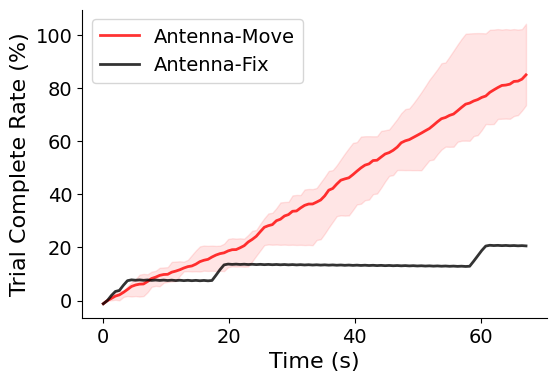

In [33]:
def plot_ot_complete_rate(d1, d2):
    fig, ax = plt.subplots(1,1,figsize=(6, 4))
    end_time = min([len(d['time']) for d in d1+d2])
    set_compact_spines_format(ax, xticks=True)
    # ax.plot(t[::80], np.array(data['angular_velocity'])[:end_time][::80, -1], lw=2, color=colors[i], alpha=0.8)
    # ax.set_ylabel('Angular Velocity (rad/s)',fontsize=16)
    # for i, data in enumerate(d1):
    #     t = np.array(data['time'])[:end_time]
    #     ax.plot(t[::80], (1-(np.array(data['position'])[:end_time, 0][::80]+5.5)/10)*100, lw=2, color='r', alpha=0.8)
    d1_mean = np.mean([(1-(np.array(d['position'])[:end_time, 0]+5)/10)*100 for d in d1], axis=0)
    d1_min = np.min([(1-(np.array(d['position'])[:end_time, 0]+5)/10)*100 for d in d1], axis=0)
    d1_max = np.max([(1-(np.array(d['position'])[:end_time, 0]+5)/10)*100 for d in d1], axis=0)
    t = np.array(d1[0]['time'])[:end_time]
    ax.plot(t[::80], d1_mean[::80], lw=2, color='r', alpha=0.8, label='Antenna-Move')
    #complete
    t = np.array(d2[0]['time'])[:end_time]
    ax.plot(t[::80], (1-(np.array(d2[0]['position'])[:end_time, 0][::80]+5)/10)*100, lw=2, color='k', alpha=0.8, label='Antenna-Fix')
    ax.fill_between(t[::80], d1_min[::80], d1_max[::80], color='r', alpha=0.1)
    ax.set_xlabel('Time (s)', fontsize=16)
    ax.set_ylabel('Trial Complete Rate (%)', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14)
    return fig, ax

fig, ax = plot_ot_complete_rate(data['Normal_Move'], data['Normal_Fix'])
plt.savefig(save_path + 'odor_trail_complete_rate.pdf', dpi=300)

In [128]:
with open(f'data/OdorTrialFollowingNormalMove1_data.json', 'r') as f:
    data_move = json.load(f)

with open(f'data/OdorTrialFollowingNormalFix1_data.json', 'r') as f:
    data_fix = json.load(f)

11360


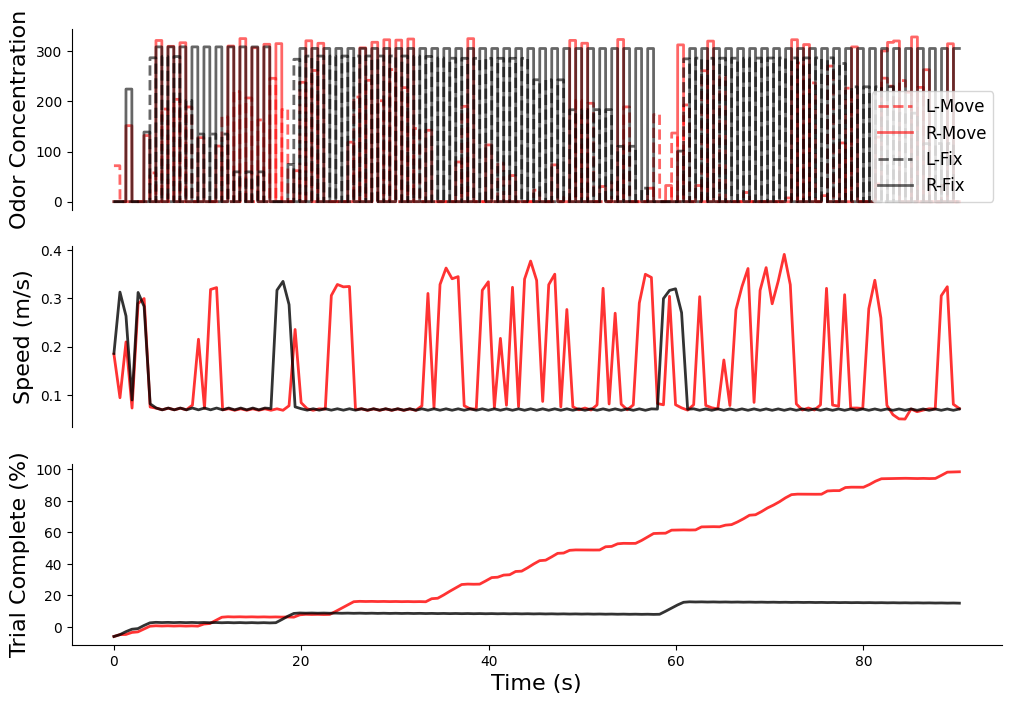

In [34]:
def calculate_velocity(data, end_time=480):
    velocity = []
    interval = 80
    t = np.array(data['time'])[:end_time]
    p = np.array(data['position'])[:end_time]
    for i in range(1, len(t)//interval):
        dt = t[i*interval] - t[(i-1)*interval]
        dx = p[i*interval][0] - p[(i-1)*interval][0]
        dy = p[i*interval][1] - p[(i-1)*interval][1]
        # dz = data['position'][i+interval][2] - data['position'][i][2]
        velocity.append([dx/dt, dy/dt])
    return t[::interval][:len(velocity)], velocity

def plot_ot_dynamic(data_list):
    fig, axes = plt.subplots(3,1,figsize=(12, 8))
    colors = ['red', 'k']
    cases = ['Move', 'Fix']
    # find the end time
    end_time = min([len(d['time']) for d in data_list])
    print(end_time)
    for i, data in enumerate(data_list):
        t = np.array(data['time'])[:end_time]
        # odor concentration
        ax = axes[0]
        ax.plot(t, 1000-np.array(data['odor_l'][:end_time]), lw=2, ls='--', color=colors[i], alpha=0.6, label=f'L-{cases[i]}')
        ax.plot(t, 1000-np.array(data['odor_r'][:end_time]), lw=2, ls='-', color=colors[i], alpha=0.6, label=f'R-{cases[i]}')
        set_compact_spines_format(ax)
        ax.set_ylabel('Odor Concentration',fontsize=16)
        ax.legend(fontsize=12)
        # translational velocity
        ax = axes[1]
        set_compact_spines_format(ax)
        vt, v = calculate_velocity(data, end_time=end_time)
        ax.plot(vt, calculate_speed(np.array(v)),  lw=2, color=colors[i], alpha=0.8)
        ax.set_ylabel('Speed (m/s)',fontsize=16)
        #angular velocity
        ax = axes[2]
        set_compact_spines_format(ax, xticks=True)
        # ax.plot(t[::80], np.array(data['angular_velocity'])[:end_time][::80, -1], lw=2, color=colors[i], alpha=0.8)
        # ax.set_ylabel('Angular Velocity (rad/s)',fontsize=16)
        #complete
        ax.plot(t[::80], (1-(np.array(data['position'])[:end_time, 0][::80]+5.5)/10)*100, lw=2, color=colors[i], alpha=0.8)
        ax.set_ylabel('Trial Complete (%)',fontsize=16)
    ax.set_xlabel('Time (s)', fontsize=16)
    return fig, ax

fig, ax = plot_ot_dynamic([data['Normal_Move'][0], data['Normal_Fix'][0]])

odor plume tracking

In [3]:
with open(f'data/OdorPlumeTracking1_data.json', 'r') as f:
    data_op = json.load(f)

In [4]:
def get_wind(data):
    wind_dir = np.arctan2(np.array(data)[:, 1], np.array(data)[:, 0])
    wind_speed = np.linalg.norm(np.array(data), axis=1)
    return wind_speed, wind_dir, np.array(data)

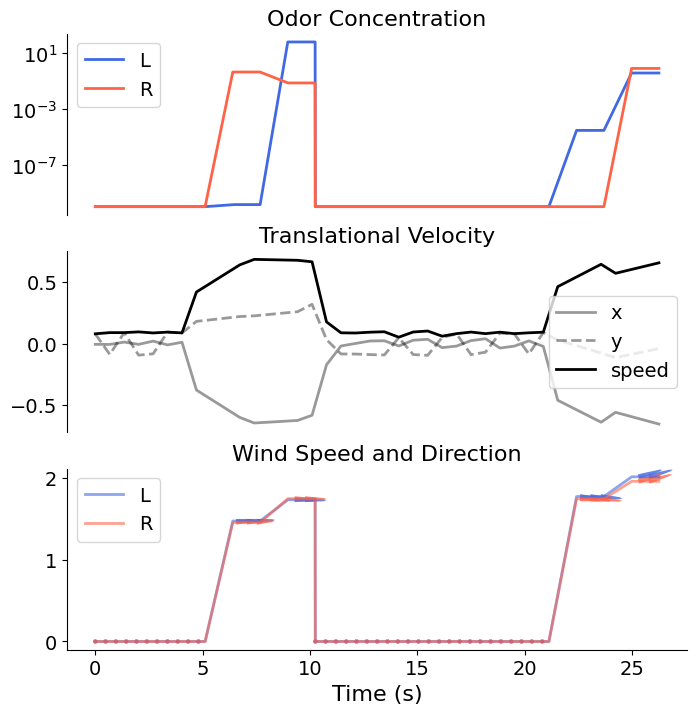

In [26]:
def plot_op_dynamic(data):
    fig, axes = plt.subplots(3,1,figsize=(8, 8))
    # left and right odor concentration
    ax = axes[0]
    ax.plot(data['time'], np.array(data['odor_l']) + 1e-10, lw=2, ls='-', color='royalblue', label='L')
    ax.plot(data['time'], np.array(data['odor_r']) + 1e-10, lw=2, ls='-', color='tomato', label='R')
    ax.set_title('Odor Concentration', fontsize=16)
    ax.set_yscale('log')
    set_compact_spines_format(ax)
    ax.legend(fontsize=14)
    # ax.set_ylim(0, 1)
    # translational velocity
    ax = axes[1]
    vt, v = calculate_velocity(data, end_time=len(data['time']))
    ax.plot(vt, np.array(v)[:,0], ls='-', lw=2, color='k', alpha=0.4, label='x')
    ax.plot(vt, np.array(v)[:,1], ls='--', lw=2, color='k', alpha=0.4, label='y')
    ax.plot(vt, calculate_speed(np.array(v)),  lw=2, color='k', label='speed')
    set_compact_spines_format(ax)
    ax.set_title('Translational Velocity',fontsize=16)
    ax.legend(fontsize=14)
    # angular velocity
    # ax = axes[2]
    # ax.plot(data['time'], np.array(data['angular_velocity'])[:, -1], lw=2, color='k', alpha=0.8)
    # set_compact_spines_format(ax, xticks=True)
    # ax.set_title('Angular Velocity')
    
    # wind direction
    ax = axes[2]
    ws, _, wd = get_wind(data['wind_l'])

    ax.plot(data['time'], ws, lw=2, color='royalblue', alpha=0.6, label='L')
    interval = 60
    ax.quiver(data['time'][::interval], ws[::interval], wd[::interval, 0], wd[::interval, 1], color='royalblue',
              scale=50, headwidth=0.4, headlength=0.6, lw=0.8, alpha=0.8)
    ws, _, wd = get_wind(data['wind_r'])
    ax.quiver(data['time'][::interval], ws[::interval], wd[::interval, 0], wd[::interval, 1], color='tomato',
              scale=50, headwidth=0.4, headlength=0.6, lw=0.8, alpha=0.8)
    ax.plot(data['time'], ws, lw=2, color='tomato', alpha=0.6, label='R')
    ax.legend(fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=16)
    ax.set_title('Wind Speed and Direction', fontsize=16)
    set_compact_spines_format(ax, xticks=True)
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=14)
    return fig, axes

fig, ax = plot_op_dynamic(data_op)

plt.savefig(save_path + 'odor_plume_tracking.pdf', dpi=300)